# Widgets without writing widgets: interact

The Jupyter widgets library offers tools to create rich graphical controls from your Python code that connect JavaScript elements such as buttons and menus with your Python kernel. 

As an example, this interface below consists of a collection of components for simulating binary star orbits, built with Jupyter Widgets:

+ Green: [pythreejs](https://github.com/jupyter-widgets/pythreejs)
+ Blue: [bqplot](https://github.com/bloomberg/bqplot/blob/master/examples/Index.ipynb)
+ Everything else: [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
+ Serving it up to users during development on [mybinder.org](https://mybinder.org/)

![Binary Star Simulator](images/Binary_Star_Sim.png)

You can [find here](https://github.com/JuanCab/AstroInteractives) the source for this example (including links to binder), created by [Juan Cabanela](http://www.cabanela.com) from the Minnesota State University Physics and Astronomy Department. This short video illustrates the demo:

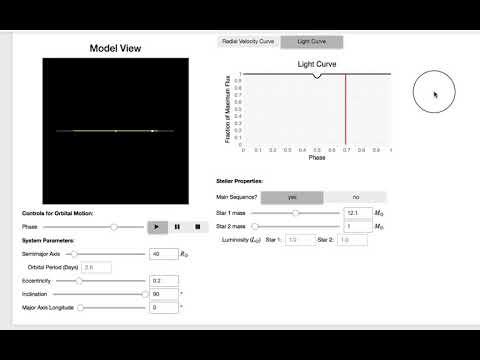

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("kbgST0uifvM")

But in this notebook, we're going to see first how to walk before we run! For the most simple tasks, `ipywidgets` provides some convenience functions that give you interactive controls for simple parameter exploration with barely writing any new code, and without having to learn much about GUI programming paradigms.  The `interact` function (`ipywidgets.interact`) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython's widgets.

In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Basic `interact`

At the most basic level, `interact` autogenerates UI controls for function arguments, and then calls the function with those arguments when you manipulate the controls interactively. To use `interact`, you need to define a function that you want to explore. Here is a function that triples its argument, `x`.

In [4]:
def f(x):
    return 3*x

When you pass this function as the first argument to `interact` along with an integer keyword argument (`x=10`), a slider is generated and bound to the function parameter.

In [5]:
interact(f, x=10);

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

When you move the slider, the function is called, and the return value is printed.

If you pass `True` or `False`, `interact` will generate a checkbox:

In [6]:
interact(f, x=True);

interactive(children=(Checkbox(value=True, description='x'), Output()), _dom_classes=('widget-interact',))

If you pass a string, `interact` will generate a `Text` field.

In [7]:
interact(f, x='Hi there!');

interactive(children=(Text(value='Hi there!', description='x'), Output()), _dom_classes=('widget-interact',))

`interact` can also be used as a decorator. This allows you to define a function and interact with it in a single shot. As this example shows, `interact` also works with functions that have multiple arguments.

In [8]:
@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=1.0, description='y', max=3.0, …

## Fixing arguments using `fixed`

There are times when you may want to explore a function using `interact`, but fix one or more of its arguments to specific values. This can be accomplished by wrapping values with the `fixed` function.

In [ ]:
def h(p, q):
    return (p, q)

When we call `interact`, we pass `fixed(20)` for q to hold it fixed at a value of `20`.

In [ ]:
interact(h, p=5, q=fixed(20));

Notice that a slider is only produced for `p` as the value of `q` is fixed.

## Widget abbreviations

When you pass an integer-valued keyword argument of `10` (`x=10`) to `interact`, it generates an integer-valued slider control with a range of `[-10,+3*10]`. In this case, `10` is an *abbreviation* for an actual slider widget:

```python
IntSlider(min=-10,max=30,step=1,value=10)
```

In fact, we can get the same result if we pass this `IntSlider` as the keyword argument for `x`:

In [ ]:
interact(f, x=widgets.IntSlider(min=-10, max=30, step=1, value=10));

This examples clarifies how `interact` proceses its keyword arguments:

1. If the keyword argument is a `Widget` instance with a `value` attribute, that widget is used. Any widget with a `value` attribute can be used, even custom ones.
2. Otherwise, the value is treated as a *widget abbreviation* that is converted to a widget before it is used.

The following table gives an overview of different widget abbreviations:

<table class="table table-condensed table-bordered">
  <tr><td><strong>Keyword argument</strong></td><td><strong>Widget</strong></td></tr>  
  <tr><td>`True` or `False`</td><td>Checkbox</td></tr>  
  <tr><td>`'Hi there'`</td><td>Text</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if integers are passed</td><td>IntSlider</td></tr>
  <tr><td>`value` or `(min,max)` or `(min,max,step)` if floats are passed</td><td>FloatSlider</td></tr>
  <tr><td>`['orange','apple']` or `[('one', 1), ('two', 2)]`</td><td>Dropdown</td></tr>
</table>
Note that a dropdown is used if a list or a list of tuples is given (signifying discrete choices), and a slider is used if a tuple is given (signifying a range).

You have seen how the checkbox and textarea widgets work above. Here, more details about the different abbreviations for sliders and dropdowns are given.

If a 2-tuple of integers is passed `(min,max)`, an integer-valued slider is produced with those minimum and maximum values (inclusively). In this case, the default step size of `1` is used.

In [ ]:
interact(f, x=(0, 4));

A `FloatSlider` is generated if any of the values are floating point. The step size can be changed by passing a third element in the tuple.

In [ ]:
interact(f, x=(0, 10, 1));

For both integer and float-valued sliders, you can pick the initial value of the widget by passing a default keyword argument to the underlying Python function. Here we set the initial value of a float slider to `5.5`.

In [ ]:
@interact(x=(0.0, 20.0, 0.5))
def h(x=5.5):
    return x

Dropdown menus are constructed by passing a list of strings. In this case, the strings are both used as the names in the dropdown menu UI and passed to the underlying Python function.

In [ ]:
interact(f, x=['apples','oranges']);

If you want a dropdown menu that passes non-string values to the Python function, you can pass a list of tuples of the form `('label', value)`. The first items are the names in the dropdown menu UI and the second items are values that are the arguments passed to the underlying Python function.

In [ ]:
interact(f, x=[('one', 10), ('two', 20)]);

## `interactive`

In addition to `interact`, IPython provides another function, `interactive`, that is useful when you want to reuse the widgets that are produced or access the data that is bound to the UI controls.

Note that unlike `interact`, the return value of the function will not be displayed automatically, but you can display a value inside the function with `IPython.display.display`.

Here is a function that returns the sum of its two arguments and displays them.

In [ ]:
from IPython.display import display

def f(a, b):
    display(a + b)
    return a+b

Unlike `interact`, `interactive` returns a `Widget` instance rather than immediately displaying the widget.

In [ ]:
w = interactive(f, a=10, b=20)

The widget is an `interactive`, a subclass of `VBox`, which is a container for other widgets.

In [ ]:
type(w)

The children of the `interactive` are two integer-valued sliders and an output widget, produced by the widget abbreviations above.

In [ ]:
w.children

To actually display the widgets, you can use IPython's `display` function.

In [ ]:
display(w)

At this point, the UI controls work just like they would if `interact` had been used. You can manipulate them interactively and the function will be called. However, the widget instance returned by `interactive` also gives you access to the current keyword arguments and return value of the underlying Python function. 

Here are the current keyword arguments. If you rerun this cell after manipulating the sliders, the values will have changed.

In [ ]:
w.kwargs

Here is the current return value of the function.

In [ ]:
w.result

## Basic interactive plot

Though the examples so far in this notebook had very basic output, more interesting possibilities are straightforward. 

The function below plots a straight line whose slope and intercept are given by its arguments.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()


The interactive below displays a line whose slope and intercept is set by the sliders. Note that if the variable containing the widget, `interactive_plot`, is the last thing in the cell it is displayed.

In [10]:
interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

## Disabling continuous updates

When interacting with long running functions, or even with short functions whose results take some to display, realtime feedback is a burden instead of being helpful. You might have noticed the output of some of the widgets above "flickering" as you adjusted the controls. By default, `interact` and `interactive` call the function for every update of the widgets value. 

There are two ways to mitigate this.  You can either only execute on demand, or restrict execution to mouse release events.

### `interact_manual`

The `interact_manual` function provides a variant of interaction that allows you to restrict execution so it is only done on demand.  A button is added to the interact controls that allows you to trigger an execute event.

In [ ]:
def slow_function(i):
    """
    Sleep for 1 second then print the argument
    """
    from time import sleep
    print('Sleeping...')
    sleep(1)
    print(i)

interact_manual(slow_function,i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4));

You can do the same thing with `interactive` by using the a `dict` as the second argument, as shown below.

In [ ]:
foo = interactive(slow_function, {'manual': True}, i=widgets.FloatSlider(min=1e4, max=1e6, step=1e4))
foo

### `continuous_update`

If you are using slider widgets, you can set the `continuous_update` kwarg to `False`.  `continuous_update` is a keyword argument of slider widgets that restricts executions to mouse release events.

In ipywidgets 7, the `Text` and `Textarea` controls also have a `continuous_update` argument.

The first example below provides the `continuous_update` argument when the widget is created.

In [ ]:
interact(slow_function,i=widgets.FloatSlider(min=1e4, max=1e6, step=5e4, continuous_update=False));

# For more information 

For more extended examples of `interact` and `interactive`, see [the example in the ipywidgets source repository](https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Index.ipynb).